# Graph-1 (basic graph)

In [3]:
%pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.1 MB/s eta 0:00:00


In [4]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [6]:
class AgentState(TypedDict): #our state schema
    message: str


def greeting_node(state: AgentState) -> AgentState:
  """Simple code that adds greeting message to the state"""

  state['message'] = 'Hey ' + state['message'] + ', how is your day going?'
  return state

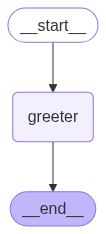

In [10]:
graph = StateGraph(AgentState)
graph.add_node("greeter",greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")
app = graph.compile()

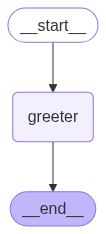

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [12]:
result = app.invoke({"message": "Bob"})

In [13]:
result['message']

'Hey Bob, how is your day going?'

## excercise-1

In [14]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [15]:
class AgentState(TypedDict): #our state schema
    message: str

def complimenter_node(state: AgentState) -> AgentState:
  """Simple code that adds complementary message to the state"""

  state['message'] = 'Hey ' + state['message'] + ', you are doing amazing job!'
  return state

In [16]:
graph = StateGraph(AgentState)
graph.add_node("complimenter",complimenter_node)
graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")
app = graph.compile()

In [17]:
app.invoke({"message": "Bob"})

{'message': 'Hey Bob, you are doing amazing job!'}

# Graph -2 (adding multiple inputs)

In [19]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph

In [20]:
class AgentState(TypedDict): #our state schema
    values: List[int]
    name: str
    result: str



In [39]:
def process_value(state: AgentState) -> AgentState:
  """this function handle multiple different values"""
  state['result'] = f"Hi there {state['name']} your sum = {sum(state['values'])}"
  return state


In [40]:
graph = StateGraph(AgentState)
graph.add_node("processor",process_value)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

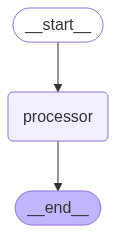

In [41]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [42]:
answers = app.invoke({'name':'Bob', 'values': [1,2,3,4]})

In [44]:
print(answers)

{'values': [1, 2, 3, 4], 'name': 'Bob', 'result': 'Hi there Bob your sum = 10'}


In [43]:
answers['result']

'Hi there Bob your sum = 10'

## Exercise-2

In [57]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph
import math

In [58]:
class AgentState(TypedDict): #our state schema
    values: List[int]
    name: str
    operator: str
    result: str

In [59]:
def calculator(state: AgentState) -> AgentState:
  """this function handle multiple different operations"""
  if state['operator'] == '+':
    state['result'] = f"Hi {state['name']} your answer is = {sum(state['values'])}"
  elif state['operator'] == '*':
    state['result'] = f"Hi {state['name']} your answer is = {math.prod(state['values'])}"

  return state

In [60]:
graph = StateGraph(AgentState)
graph.add_node("calculator",calculator)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")
app = graph.compile()

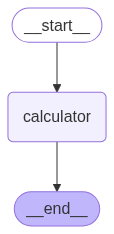

In [61]:
app

In [62]:
answers = app.invoke({'name':'Bob', 'values': [1,2,3,4], 'operator':'+'})

In [63]:
print(answers)

{'values': [1, 2, 3, 4], 'name': 'Bob', 'operator': '+', 'result': 'Hi Bob your answer is = 10'}


# Graph -3 (adding multiple nodes and edges)

In [64]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [65]:
class AgentState(TypedDict): #our state schema
    name: str
    age: str
    final: str

In [83]:
def first_node(state: AgentState) -> AgentState:
  """First node of our graph"""
  state['final'] = f"Hi {state['name']}!"
  return state

In [84]:
def second_node(state: AgentState) -> AgentState:
  """Second node of our graph"""
  state['final'] = state['final'] + f" You are {state['age']} years old!"
  return state

In [85]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()


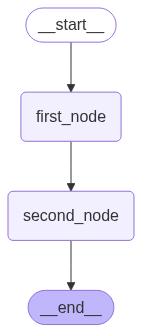

In [86]:
app

In [87]:
answers= app.invoke({'name': 'Bob', 'age' : '26'})

In [88]:
print(answers)

{'name': 'Bob', 'age': '26', 'final': 'Hi Bob! You are 26 years old!'}


## Exercise - 3

In [103]:
 from typing import Dict, TypedDict
 from langgraph.graph import StateGraph

In [104]:
class AgentState(TypedDict): #our state schema
    name: str
    age: str
    skills: List[str]
    result: str

In [105]:
def first_node(state: AgentState) -> AgentState:
  """First node of our graph"""
  state['result'] = f"Hi {state['name']}!"
  return state

In [106]:
def second_node(state: AgentState) -> AgentState:
  """Second node of our graph"""
  state['result'] = state['result'] + f" You are {state['age']} years old!"
  return state

In [107]:
def third_node(state: AgentState) -> AgentState:
  """Third node of our graph"""
  state['result'] = state['result'] + f" You have skills in {', '.join(state['skills'])} skills!"
  return state
#

In [108]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")
app = graph.compile()

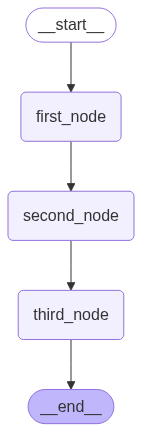

In [109]:
app

In [110]:
answers = app.invoke({'name': 'Bob', 'age' : '26', 'skills': ['Python', 'Java', 'C++']})

In [111]:
print(answers)

{'name': 'Bob', 'age': '26', 'skills': ['Python', 'Java', 'C++'], 'result': 'Hi Bob! You are 26 years old! You have skills in Python, Java, C++ skills!'}


# Graph-4 (conditional edges)

In [113]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [119]:
class AgentState(TypedDict): #our state schema
    number1: int
    number2: int
    operation: str
    finalNumber: int

In [120]:
def adder(state: AgentState) -> AgentState:
  """Add two numbers"""
  state['finalNumber'] = state['number1'] + state['number2']
  return state

In [121]:
def subtractor(state: AgentState) -> AgentState:
  """subtract two numbers"""
  state['finalNumber'] = state['number1'] - state['number2']
  return state

In [122]:
def decide_next_node(state: AgentState) -> AgentState:
  """This node will select the next node of the graph"""
  if state['operation'] == '+':
    return "addition_operation"
  elif state['operation'] == '-':
    return "subtraction_operation"

In [124]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)  # pass through function
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
    )
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
app = graph.compile()


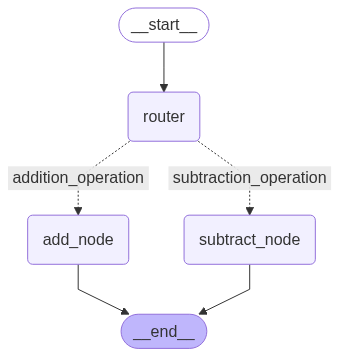

In [125]:
app

In [128]:
answer = app.invoke({'number1': 10, 'number2': 5, 'operation': '+'})

In [129]:
print(answer)

{'number1': 10, 'number2': 5, 'operation': '+', 'finalNumber': 15}


In [130]:
initial_state_1 = AgentState(number1=10, number2=5, operation='-')
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'operation': '-', 'finalNumber': 5}


## Exercise-4

In [132]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [133]:
class AgentState(TypedDict): #our state schema
    number1: int
    number2: int
    operation1: str
    number3: int
    number4: int
    operation2: str
    finalNumber1: int
    finalNumber2: int

In [138]:
def adder(state: AgentState) -> AgentState:
  """Add two numbers"""
  state['finalNumber1'] = state['number1'] + state['number2']
  return state

def adder2(state: AgentState) -> AgentState:
  """Add two numbers  in part 2"""
  state['finalNumber2'] = state['number3'] + state['number4']
  return state

def subtractor(state: AgentState) -> AgentState:
  """subtract two numbers"""
  state['finalNumber1'] = state['number1'] - state['number2']
  return state

def subtractor2(state: AgentState) -> AgentState:
  """subtract two numbers  in part 2"""
  state['finalNumber2'] = state['number3'] - state['number4']
  return state

def decide_next_node(state: AgentState) -> AgentState:
  """This node will select the next node of the graph"""
  if state['operation1'] == '+':
    return "addition_operation"
  elif state['operation1'] == '-':
    return "subtraction_operation"

def decide_next_node2(state: AgentState) -> AgentState:
  """This node will select the next node of the graph in part 2"""
  if state['operation2'] == '+':
    return "addition_operation2"
  elif state['operation2'] == '-':
    return "subtraction_operation2"


In [140]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node", subtractor)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router", lambda state:state)  # pass through function
graph.add_node("router2", lambda state:state)  # pass through function
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        # Edge: Node
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

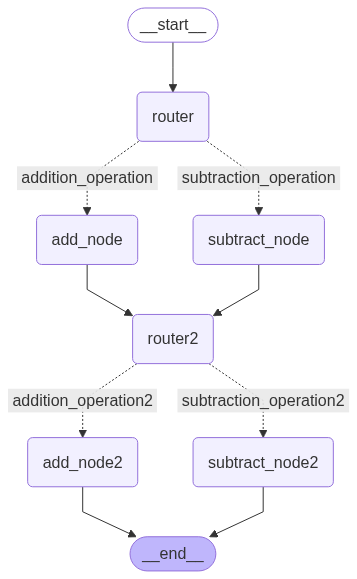

In [141]:
app

In [142]:
answer = app.invoke({"number1": 10, "number2": 5, "operation1": "+", "number3": 20, "number4": 15, "operation2": "+"})

In [143]:
print(answer)

{'number1': 10, 'number2': 5, 'operation1': '+', 'number3': 20, 'number4': 15, 'operation2': '+', 'finalNumber1': 15, 'finalNumber2': 35}


# Graph-5 (Looping Graph)

In [144]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [146]:
class AgentState(TypedDict): #our state schema
    name: str
    number: List[int]
    counter: int

In [156]:
def greeting_node(state: AgentState) -> AgentState:
  """Simple code that adds greeting message to the state"""
  state['name'] = f"Hi there {state['name']}!"
  state['counter'] = 0
  return state

def random_node(state: AgentState) -> AgentState:
    """generate random number from 0 to 10"""
    state['number'].append(random.randint(1, 10))
    state['counter'] += 1
    return state

def should_continue(state: AgentState) -> bool:
    """check if loop should stop or continue"""
    if state['counter'] < 5:
      print("Entering loop", state['counter'])
      return "loop"
    else:
      return "exit"

In [157]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge(START, "greeting")
graph.add_edge("greeting", "random")
graph.add_conditional_edges(
    "random", # source node
    should_continue, # action node
    {
        "loop": "random", # loop back to same node
        "exit": END    # end the loop
    }
)
app = graph.compile()

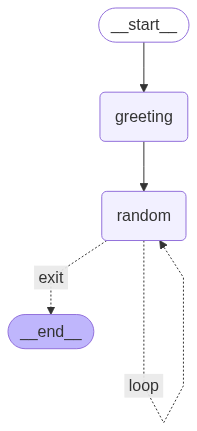

In [158]:
app

In [160]:
answer = app.invoke({"name": "Bob", 'number':[]})
print(answer)

Entering loop 1
Entering loop 2
Entering loop 3
Entering loop 4
{'name': 'Hi there Bob!', 'number': [7, 1, 2, 10, 3], 'counter': 5}


## Exercise-5

In [184]:
from typing import TypedDict, List, Dict
import random
from langgraph.graph import START, END, StateGraph

In [185]:
class AgentState(TypedDict): #our state schema
    name: str
    attempts: int
    guess: int
    lower_bound: int
    upper_bound: int
    answer: int

In [197]:
def setup(state: AgentState) -> AgentState:
  """Set up the game"""
  state['attempts'] = 0
  state['lower_bound'] = 1
  state['upper_bound'] = 20
  state['answer'] = random.randint(state['lower_bound'], state['upper_bound'])
  return state

def guess(state: AgentState) -> AgentState:
  """Guess the number"""
  state['attempts'] += 1
  state['guess'] = random.randint(state['lower_bound'], state['upper_bound'])
  return state

def hint(state: AgentState) -> AgentState:
    """Hint for the guess"""
    if state['guess'] == state['answer']:
        print("Current guess", state['guess'])
        print("Correct Answer")
    elif state['attempts'] == 7:
        print("Current guess", state['guess'])
        print("You have reached the maximum number of attempts")
    elif state['guess'] < state['answer']:
        print("Current guess", state['guess'])
        print("Hint: Go Higher")
        state['lower_bound'] = state['guess']
    elif state['guess'] > state['answer']:
        print("Current guess", state['guess'])
        print("Hint: Go Lower")
        state['upper_bound'] = state['guess']
    return state

# Routing logic
def route_from_hint(state: AgentState) -> AgentState:
    if state['guess'] == state['answer']:
        return "end"
    elif state['attempts'] == 7:
        return "end"
    else:
        return "loop"


In [198]:
# Build graph
graph = StateGraph(AgentState)
graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint", hint)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")
graph.add_conditional_edges(
    "hint",
    route_from_hint,
    {"loop": "guess", "end": END}
)

app = graph.compile()

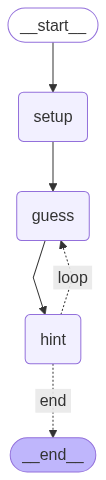

In [199]:
app

In [201]:
answer = app.invoke({"name": "Bob", })
print(answer)

Current guess 3
Hint: Go Higher
Current guess 19
Hint: Go Lower
Current guess 11
Hint: Go Lower
Current guess 8
Correct Answer
{'name': 'Bob', 'attempts': 4, 'guess': 8, 'lower_bound': 3, 'upper_bound': 11, 'answer': 8}
